In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

sns.set_theme()
sns.set_context("talk")


In [2]:
from bootstrap_function import perform_bootstrap

In [22]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from math import log2
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('../master_df_3.csv')
df = df.drop(df.columns[0], axis=1)
df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line
0,PRF5_B3_pickup,Track_0,0,12,0,0,0,0,0,11,...,29.000,1.000,10.000,9.781,0.093,0.123,0.059,0.100,0.017,PRF5
1,PRF5_B3_pickup,Track_1,1,10,0,0,0,0,0,9,...,2.000,0.000,1.000,0.928,0.087,0.116,0.040,0.094,0.023,PRF5
2,PRF5_B3_pickup,Track_2,2,3,0,0,0,0,0,2,...,4.000,2.000,4.000,1.414,0.067,0.075,0.056,0.070,0.008,PRF5
3,PRF5_B3_pickup,Track_3,3,7,0,0,0,0,0,6,...,12.837,2.459,6.725,3.562,0.096,0.100,0.094,0.096,0.002,PRF5
4,PRF5_B3_pickup,Track_4,4,3,0,0,0,0,0,2,...,15.758,7.837,15.758,5.601,0.075,0.080,0.071,0.073,0.004,PRF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28951,JHH4 C2 Pickup,Track_562,171,28,1,2,0,0,0,29,...,12.144,1.261,3.776,2.951,20.357,30.860,0.938,23.666,8.401,JHH4
28952,JHH4 C2 Pickup,Track_563,172,24,1,2,0,0,0,25,...,26.095,0.513,6.390,7.976,11.447,22.958,0.681,11.079,6.412,JHH4
28953,JHH4 C2 Pickup,Track_571,180,17,0,0,0,0,0,16,...,39.380,0.910,10.010,9.622,13.101,20.086,8.683,10.978,4.414,JHH4
28954,JHH4 C2 Pickup,Track_578,187,7,0,0,0,0,0,6,...,32.209,8.133,15.220,9.544,1.150,1.464,0.510,1.325,0.317,JHH4


In [4]:
df.cell_line.unique()

array(['PRF5', 'JHH4', 'JHH6', 'JHH7', 'JHH7_2.5uM', 'JHH6_2.5uM',
       'JHH7_0uM', 'JHH6_0uM', 'JHH7_1uM', 'JHH6_1uM', 'Huh7', 'Kami41'],
      dtype=object)

In [23]:
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

max_length:  2314
dict_keys(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3'])


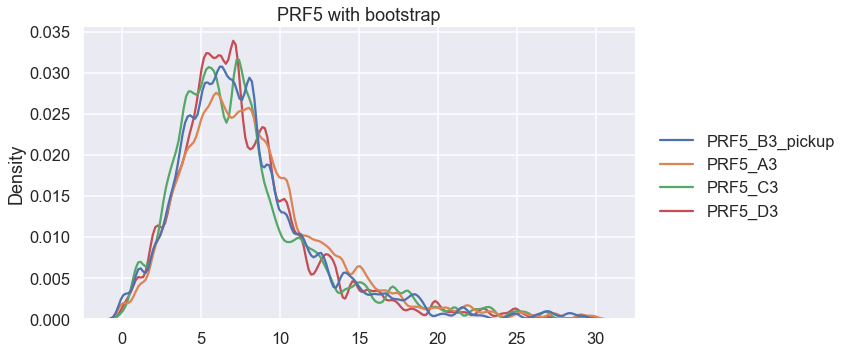

In [5]:
PRF5_bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='PRF5')
PRF5_bootstrap_df = pd.DataFrame.from_dict(PRF5_bootstrap_dict)
PRF5_bootstrap_df = PRF5_bootstrap_df.reset_index(drop=True)
PRF5_bootstrap_df

sns.displot(PRF5_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='PRF5 with bootstrap')

In [24]:
p = PRF5_bootstrap_df['PRF5_B3_pickup']
q = PRF5_bootstrap_df['PRF5_A3']

print('KL(P||Q) = %1.3f' % kl_divergence(p, q))
# plt.plot(x, p)
# plt.plot(x, q, c='red')

ValueError: math domain error

max_length:  336
dict_keys(['JHH4_B2', 'JHH4_A2', 'JHH4 D2', 'JHH4 C2 Pickup'])


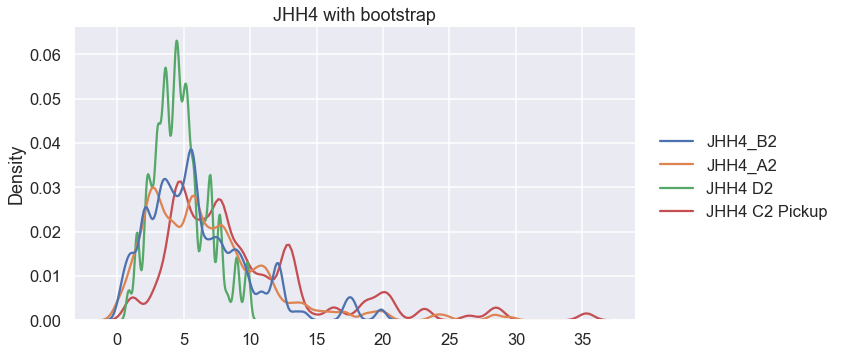

In [6]:
JHH4_bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='JHH4')
JHH4_bootstrap_df = pd.DataFrame.from_dict(JHH4_bootstrap_dict)
JHH4_bootstrap_df = JHH4_bootstrap_df.reset_index(drop=True)

sns.displot(JHH4_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='JHH4 with bootstrap')

max_length:  958
dict_keys(['JHH6_A1', 'JHH6_B1', 'JHH6_D1', 'JHH6_C1_pickup'])


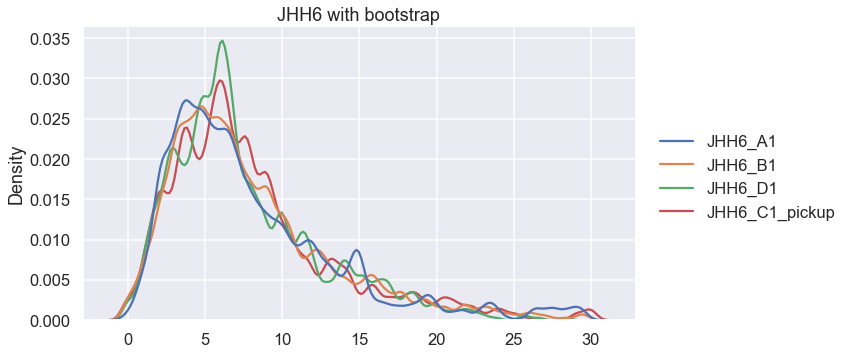

In [7]:
JHH6_bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='JHH6')
JHH6_bootstrap_df = pd.DataFrame.from_dict(JHH6_bootstrap_dict)
JHH6_bootstrap_df = JHH6_bootstrap_df.reset_index(drop=True)

sns.displot(JHH6_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='JHH6 with bootstrap')

max_length:  285
dict_keys(['JHH7_C5', 'JHH7_D5', 'JHH7_A5', 'JHH7_B5_pickup'])


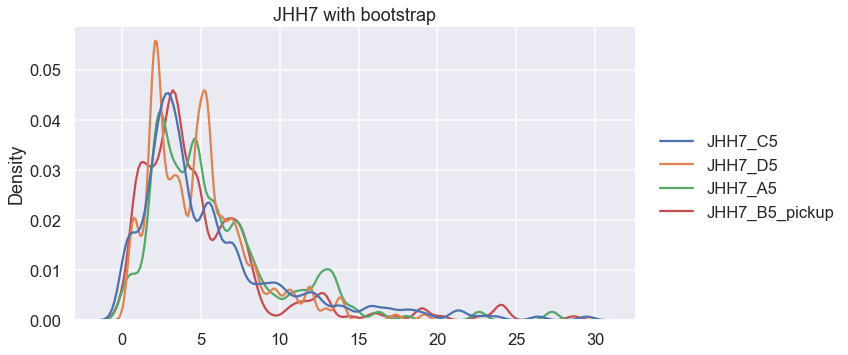

In [8]:
JHH7_bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='JHH7')
JHH7_bootstrap_df = pd.DataFrame.from_dict(JHH7_bootstrap_dict)
JHH7_bootstrap_df = JHH7_bootstrap_df.reset_index(drop=True)

sns.displot(JHH7_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='JHH7 with bootstrap')

max_length:  2583
dict_keys(['Huh7_B4_Pickup', 'Huh7_A4', 'Huh7_C4', 'Huh7_D4'])


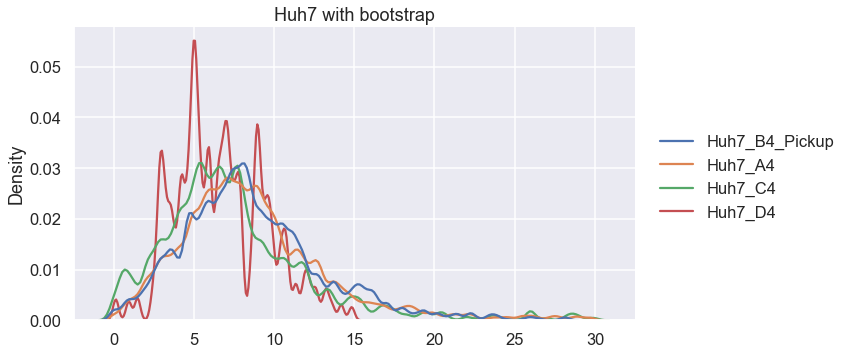

In [9]:

Huh7_bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='Huh7')
Huh7_bootstrap_df = pd.DataFrame.from_dict(Huh7_bootstrap_dict)
Huh7_bootstrap_df = Huh7_bootstrap_df.reset_index(drop=True)

sns.displot(Huh7_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='Huh7 with bootstrap')

max_length:  618
dict_keys(['Kami41_A6', 'Kami41_C6', 'Kami41_D6', 'Kami41_B6_pickup'])


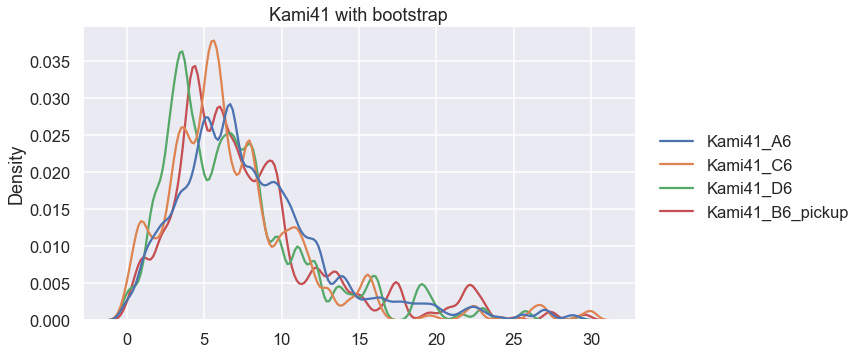

In [10]:

Kami41_bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='Kami41')
Kami41_bootstrap_df = pd.DataFrame.from_dict(Kami41_bootstrap_dict)
Kami41_bootstrap_df = Kami41_bootstrap_df.reset_index(drop=True)

sns.displot(Kami41_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='Kami41 with bootstrap')